# Titanic Project

## Overview

### **1) Understand Data and its contents**

### **2) Clean Data**
### **3) Explore Data**
### **4) Feature Engineering**
### **5) Data Preprocessing**
### **6) Model Building**
### **7) Model Tuning**
### **8) Ensemble Model Building**
### **9) Results**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
train_location = r"C:\Users\William\Desktop\repository\kaggle_competitions\titanic\resources\train.csv"
test_location = r"C:\Users\William\Desktop\repository\kaggle_competitions\titanic\resources\test.csv"

In [4]:
# Make sure Matplotlib does not open graphs in new tab
%matplotlib inline


In [3]:
training = pd.read_csv(train_location)
testing = pd.read_csv(test_location)

In [5]:
training.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Project Planning

- Understand nature of data with info() and describe()
- Histograms and boxplot
- Handle Missing Data
- Correlations between metrics
- Find Themes
    - Bigger families survived?
    - Richest people?
    - Ticket Price by Age?
    - Young and rich?
- Feature Engineering
- Preprocess data or use a transformer?
- Scaling
- Model baseline

### Light data Exploration

**1) Numeric data**
- Histograms to understand distribution
- Correlation Plots
- Pivot tables to compare survival rates across numerical variables

**2) Categorical data**
- Bar chart to understand class distribution
- Pivot Table to understand relationship of data with survival

In [7]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Conclusion
1. Since Cabin has mostly empty data we should avoid using this metric.
2. We should avoid using records with Age == null

In [8]:
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
training.dtypes.value_counts()

int64      5
object     5
float64    2
dtype: int64

### Note

- According to Value counts we have 5 categorical variables and 7 numeric variables. This is measleading as Survived and PClass are also categorical;
- We then have 7 categorical variables (Survived, PClass, Sex, Ticket, Cabin, Embarked, Name) and 5 numerical (Age, SibSp, Parch, Fare, PassengerId);
- We will exclude Cabin since it is mostly empty;
- We will exclude PassengerId and Name since they don't hold patterns that could help predict the outcome 

In [13]:
numericals = training[["Age", "SibSp", "Parch", "Fare"]]
categoricals = training[["Survived", "Pclass", "Sex", "Ticket", "Cabin", "Embarked"]]

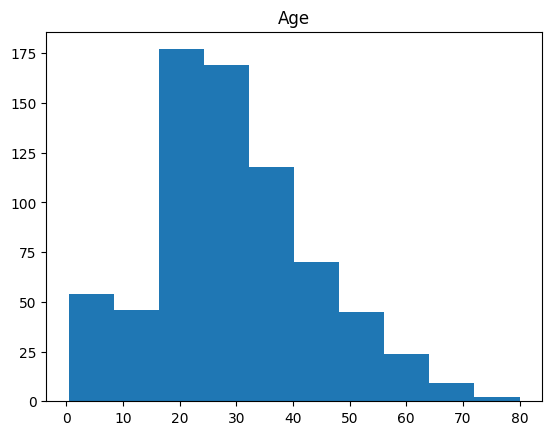

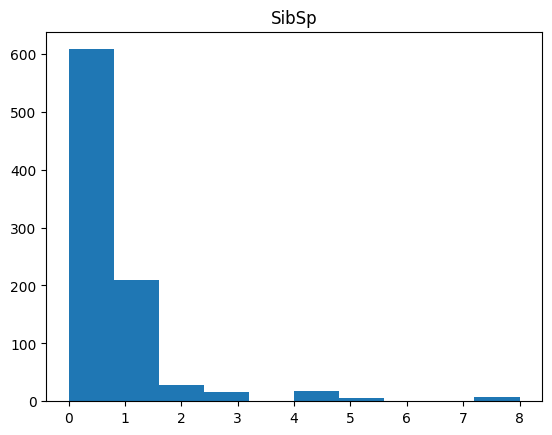

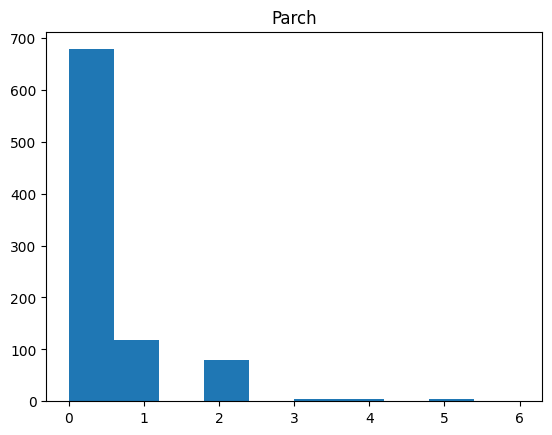

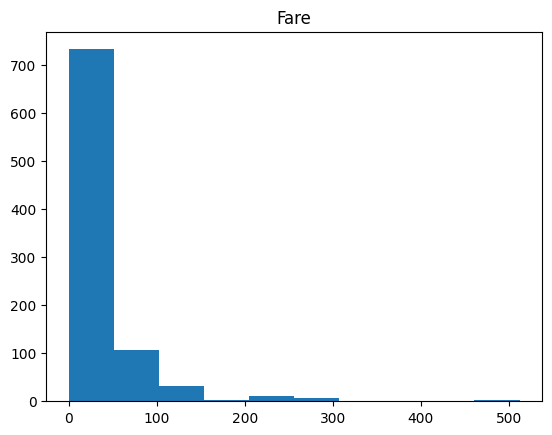

In [19]:
for numerical in numericals:
    plt.title(numerical)
    plt.hist(numericals[numerical])
    plt.show()

### Conclusion

1. Age follows a normal distribution
2. SibSp, Parch and Fare follow a non-normal distribution

<Axes: >

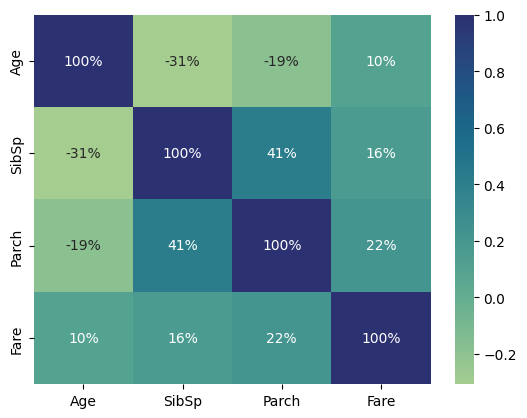

In [24]:
sns.heatmap(numericals.corr(), fmt=".0%", cmap=sns.cm._cmap, annot=True)

### Conclusion

1. There is a weak positive correlation between Parch and SibSp
2. There is a weak negative correlation between Age and SibSp

In [25]:
pd.pivot_table(training, index="Survived", values=numericals.columns)

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


## Conclusion

1. Younger people are more likely to survive
2. People who paid more for ticket are more likely to survive
3. People with parents/children tend to survive more
4. People with more siblings/spouses are more likely to survive

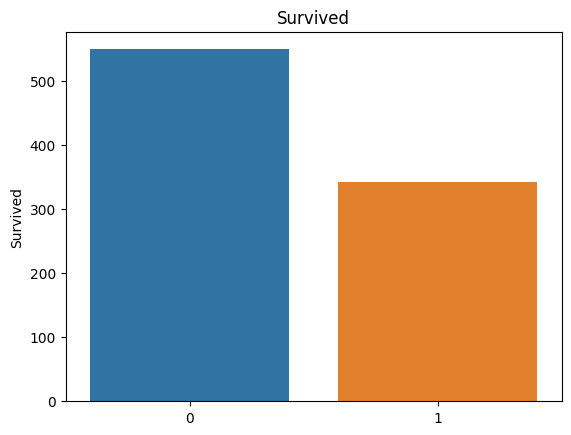

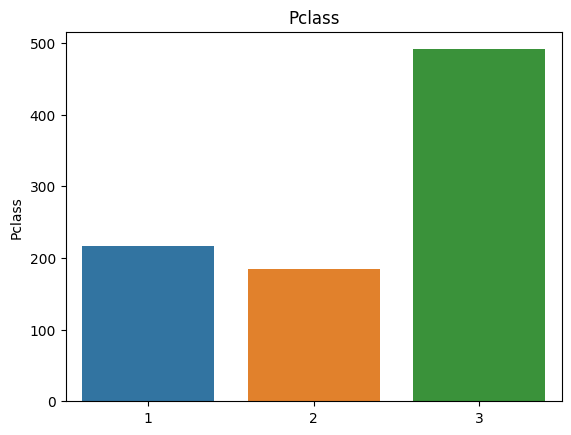

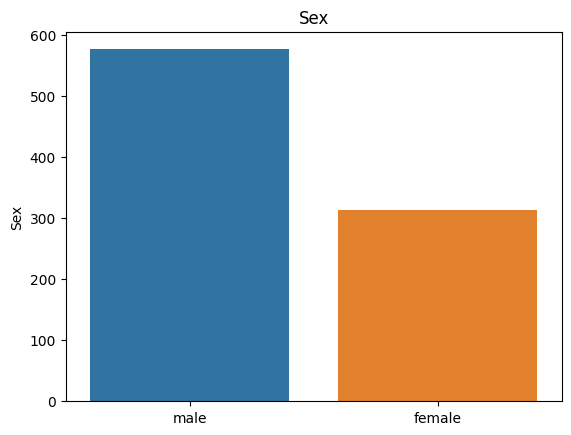

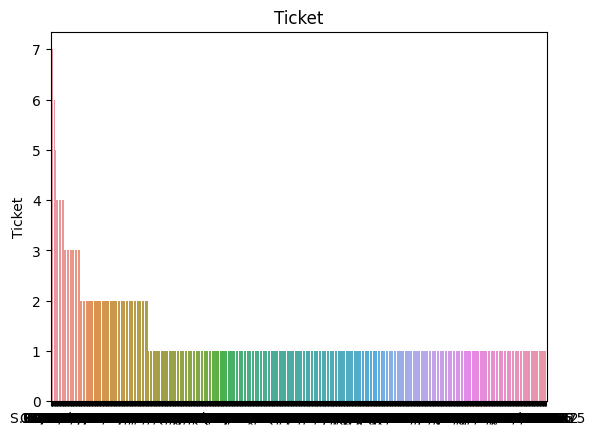

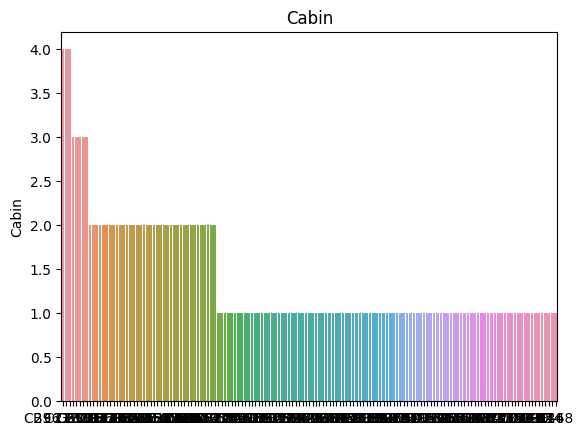

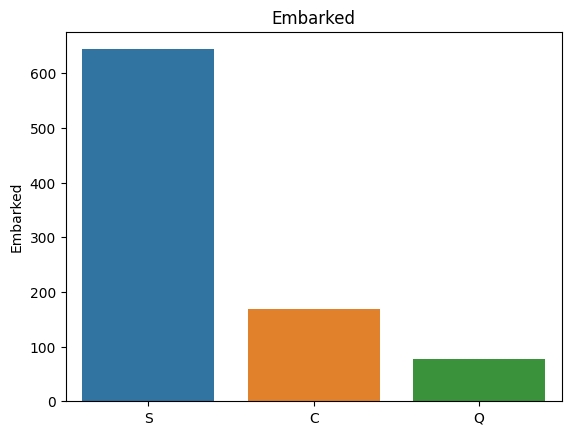

In [28]:
for categorical in categoricals:
    count = categoricals[categorical].value_counts()
    sns.barplot(x=count.index, y=count).set_title(categorical)
    plt.show()

### Notes

- We will have to fix both Cabin and Ticket Graphs.
- We will first analyse the pivot table for the normal Graphs (Pclass, Sex, Embarked)

In [34]:
for metric in ["Pclass", "Sex", "Embarked"]:
    print(pd.pivot_table(training, index="Survived",
        columns=metric, values="Ticket", aggfunc="count"
    ))
    print()

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217



### Conclusions

1. The higher the class the higher the chances of survival
2. Female has higher changes of survival
3. Port of Embarkation influences survival Rate C > Q > S

### Feature engineering

1. Simplify Cabin 
2. Do tickets influence survival rates?
3. Person title relate to survival rates?

In [36]:
categoricals["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

### Conclusions

1. Some people have more than one Cabin
2. Maybe more cabins means different rate of survival

In [39]:
count_cabin_transformer = lambda x: 0 if pd.isna(x) else len(x.split(" "))

training['cabin_number'] = training.Cabin.apply(count_cabin_transformer)
training['cabin_number'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: cabin_number, dtype: int64

In [40]:
pd.pivot_table(training, index="Survived",
    columns="cabin_number", aggfunc="count", values="Ticket" 
)

cabin_number,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


### Conclusion

- Cabin seems to influence survival rate so we should explore more possibilities around this metric.

In [42]:
first_letter_transformer = lambda x: str(x)[0]

training["cabin_letter"] = training.Cabin.apply(first_letter_transformer)

training["cabin_letter"].value_counts()

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_letter, dtype: int64

In [43]:
pd.pivot_table(training, values="Ticket", 
    index="Survived", aggfunc="count", columns="cabin_letter"
)

cabin_letter,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


### Conclusion

1. Cabin Letter seems to positively affect survival rates (except for A)
2. Not having cabin letter seems to negatively impact survival rate
3. Earlier we dismissed Cabin but now we can see it may provide useful information for our model

In [47]:
categoricals["Ticket"].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [48]:
is_numerical_transformer = lambda x: 1 if x.isnumeric() else 0

training["is_ticket_numeric"] = training.Ticket.apply(is_numerical_transformer)

training["is_ticket_numeric"].value_counts()

1    661
0    230
Name: is_ticket_numeric, dtype: int64

In [49]:
pd.pivot_table(training, index="Survived",
    columns="is_ticket_numeric", values="Ticket", aggfunc="count"
)

is_ticket_numeric,0,1
Survived,,
0,142,407
1,88,254


### Conclusions

1. The ticket being numeric or not seems to not affect survival rates (~38%)

In [53]:
def strip_ticket_name_transformer(x):
    divisions = x.split(" ")[:-1]
    not_a_string = len(divisions) <= 0
    
    if(not_a_string):
        return 0

    final_string = ''.join(divisions)
    final_string = final_string.replace('.', '')
    final_string = final_string.replace('/', '')
    return final_string.lower()

training['ticket_letters'] = training.Ticket.apply(strip_ticket_name_transformer)
training['ticket_letters'].value_counts()

0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
fcc            5
c              5
sopp           3
pp             3
wep            3
ppp            2
scah           2
sotono2        2
swpp           2
fc             1
scahbasle      1
as             1
sp             1
sc             1
scow           1
fa             1
sop            1
sca4           1
casoton        1
Name: ticket_letters, dtype: int64

In [54]:
pd.pivot_table(training, index="Survived",
    columns="ticket_letters", values="Ticket", aggfunc="count"
)

ticket_letters,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,...,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,...,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


### Conclusions

1. Is Ticket Numeric provides some additional information about our dataset but does not contribute to predicting survival rates
2. Tickets Letters has too many classes and many of those classes have low amounts of data. It is difficult to extract information as it is currently.
3. We can try to engineer the Ticket further, starting by understanding how to group ticket letters. This may provide more useful information